In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd 'drive/My Drive/Master/mlgs/project1A'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
[Errno 2] No such file or directory: 'drive/My Drive/Master/mlgs/project1A'
/content


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import norm
import scipy.special as sc
import scipy.optimize
from scipy.optimize import fsolve
from scipy.stats import truncnorm

In [2]:
step =np.arange(0, 5, 0.05)
len(step)

100

In [2]:
def auction_exp(data_auction, p):
    """Train a normalizing flow model with maximum likelihood.

    Args:
        model: normalizing flow model. Flow or StackedFlows
        dataset: dataset containing data to fit. Dataset
        batch_size: number of samples per batch. int
        max_epochs: number of training epochs. int
        frequency: frequency for plotting density visualization. int
        
    Return:
        model: trained model. Flow or StackedFlows
        losses: loss evolution during training. list of floats
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

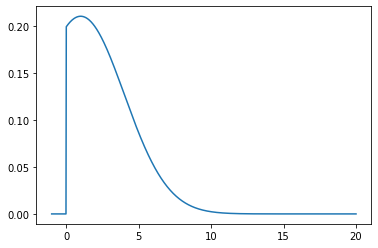

In [15]:
x_range = np.linspace(-1,20,1000)
plt.plot(x_range, truncnorm.pdf(x_range, a,  b,loc = u,scale = sigma))

array([9.85863759, 3.73891763, 7.55762784, 2.06356072, 3.37583406,
       2.17459311, 4.28251915, 1.634819  , 5.41832426, 3.21032034,
       4.4926078 , 2.23490306, 1.29101739, 5.68772813, 3.78017689,
       1.58535553, 3.96133429, 4.39778074, 4.49351019, 3.36010814,
       3.54854353, 3.02023548, 1.51593038, 3.84524298, 4.40987021,
       2.62429503, 2.70805096, 1.80463035, 3.50635976, 3.38617791,
       2.71426696, 5.64488195, 3.29081986, 2.56232748, 4.63407828,
       4.9959239 , 6.69792692, 9.38756   , 3.43720886, 4.67023899,
       1.1369476 , 1.90824542, 1.62121721, 4.81274133, 4.77979779,
       4.00874949, 2.71295881, 2.89410114, 2.51200758, 6.43017869])

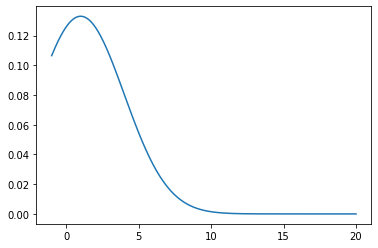

In [16]:

plt.plot(x_range, norm.pdf(x_range, loc = u,scale = sigma))
truncnorm.rvs(a = 0, b = np.inf, loc = u,scale = sigma,size=50)

In [3]:
# Experiment 5:
# This time, we use truncated normal distribution

n=1000000
myclip_a = 0
myclip_b = np.inf
u = 1
sigma = 10

#computer alpha beta for truncated normal distribution
a, b = (myclip_a - u) / sigma, myclip_b

mean, var = truncnorm.stats(a, b,loc = u,scale = sigma, moments='mv')

data_norm = truncnorm.rvs(a, b, loc = u,scale = sigma,size=n)

#constant of truncated normal distribution
k = 1/(1-norm.cdf(0, loc = u,scale = sigma))

#not super accurate, but due to the character of cdf and pde maybe also factorial
#use virtual valuation  = 0 to solve optimal reserve price
def F(x):
   return x-((1-k*(norm.cdf(x, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(k*norm.pdf(x, loc = u,scale = sigma)))

p_opt = fsolve(F, u)

#use the truncated normal distribution mean and standard deviation
r = np.sqrt(var)/mean

def f(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            
p_d = fsolve(f, [u])

reserve_p = p_d*mean/(2*p_d-1)

opt = auction_exp(data_norm,p_opt)
exp_revenue = auction_exp(data_norm,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Normal distribution DAPX = ' + str(DAPX))
print("Theoritical DAPX_normal:")
print(p_opt*(1-(norm.cdf(p_opt, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(reserve_p*(1-(norm.cdf(reserve_p, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))))

worst case robust DAPX = [4.00766681]
Normal distribution DAPX = [1.15019142]
Theoritical DAPX_normal:
[1.42730857]


In [9]:
print(8.66666719)
print(r)
print(p_opt*(1-(norm.cdf(p_opt, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma))))
(reserve_p*(1-(norm.cdf(reserve_p, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma))))
p_opt 
F(8.66666719)
p_opt = fsolve(F, mean)

8.66666719
0.748448951419565
[27.80327358]


In [ ]:
u = 1

n=1000000
DAPX_list = []
r_list = []
p_d_list = []
p_opt_list = []


def F(x):
    return x-((1-k*(norm.cdf(x, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(k*norm.pdf(x, loc = u,scale = sigma)))
def f(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   

myclip_a = 0
myclip_b = np.inf

for i in np.arange(100):


  sigma = 1 + 0.5*i
  #computer alpha beta for truncated normal distribution
  a, b = (myclip_a - u) / sigma, myclip_b
  mean, var = truncnorm.stats(a , b ,loc = u,scale = sigma, moments='mv')
  data_tnorm = truncnorm.rvs(a, b, loc = u,scale = sigma,size=n)

  #constant of truncated normal distribution
  k = 1/(1-norm.cdf(0, loc = u,scale = sigma))
  #not super accurate, but due to the character of cdf and pde maybe also factorial
  #use virtual valuation  = 0 to solve optimal reserve price
  
  p_opt = fsolve(F, mean)
  print(F(p_opt))
  p_opt_list.append(p_opt)

  r = np.sqrt(var)/mean
  r_list.append(r)
     
  p_d = fsolve(f, [mean])
  p_d_list.append(p_d)

  reserve_p = p_d*mean/(2*p_d-1)
  opt = auction_exp(data_tnorm,p_opt)
  exp_revenue = auction_exp(data_tnorm,reserve_p)

  DAPX_list.append((opt/exp_revenue)[0])


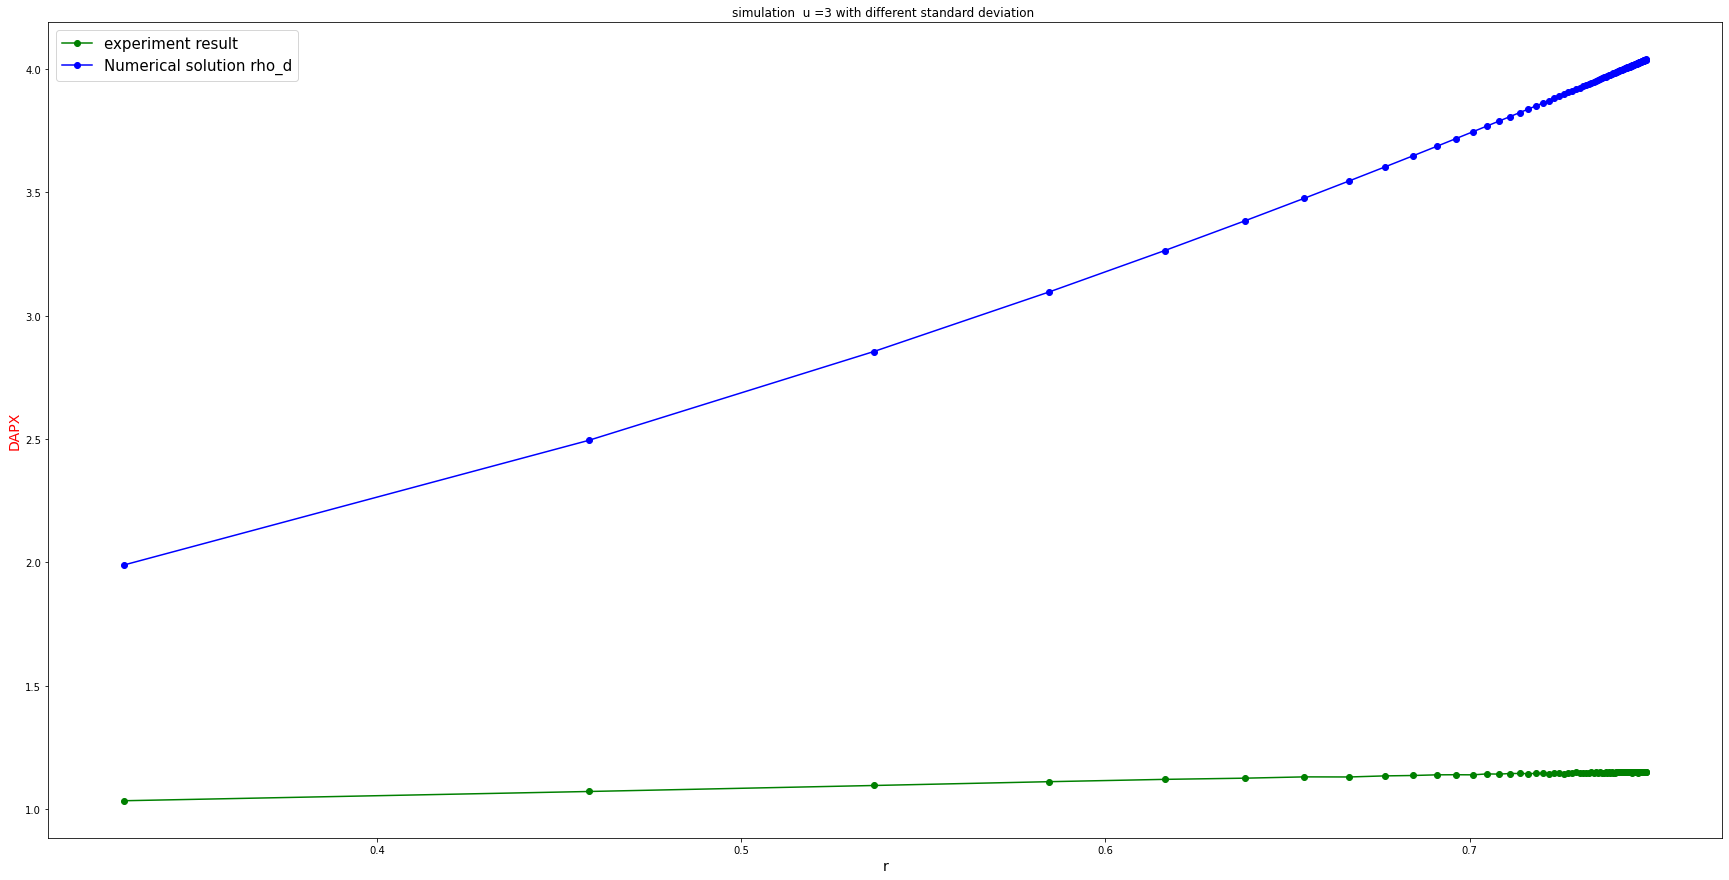

In [11]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(30, 15))
# make a plot
ax.plot(r_list, DAPX_list,color="green",marker="o",label="experiment result")
ax.plot(r_list, p_d_list,color="blue",marker="o",label="Numerical solution rho_d")
plt.legend(loc="upper left",fontsize = 15)
# set x-axis label
ax.set_xlabel("r",fontsize=14)
# set y-axis label
ax.set_ylabel("DAPX",color="red",fontsize=14)
#ax.set_ylim(0.7,1.2)
#ax.axhline(1,color="red")
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax.plot(r_list, p_d_list,color="blue",marker="o")
#ax2.set_ylabel("difference",color="blue",fontsize=14)
#ax2.axhline(0,color="red")
plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')

plt.show()

In [ ]:
sigma = 3
DAPX_list1 = []
r_list1 = []
p_d_list1 = []
p_opt_list1 = []
def F(x):
    return x-((1-k*(norm.cdf(x, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(k*norm.pdf(x, loc = u,scale = sigma)))
def f(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2  
for i in np.arange(100):

  u = 1 + 0.05*i
  data = norm.rvs(loc = u,scale = sigma,size=n)
  #remove the negative samples
  data_norm = [item for item in data if item >= 0]
  #constant of truncated normal distribution
  k = 1/(1-norm.cdf(0, loc = u,scale = sigma))
  #not super accurate, but due to the character of cdf and pde maybe also factorial
  #use virtual valuation  = 0 to solve optimal reserve price


  p_opt = fsolve(F, u)
  p_opt_list1.append(p_opt)
  r = sigma/u
  r_list1.append(r)
 
            
  p_d = fsolve(f, [u])
  p_d_list1.append(p_d)
  reserve_p = p_d*u/(2*p_d-1)
  opt = auction_exp(data_norm,p_opt)
  exp_revenue = auction_exp(data_norm,reserve_p)

  DAPX_list1.append((opt/exp_revenue)[0])


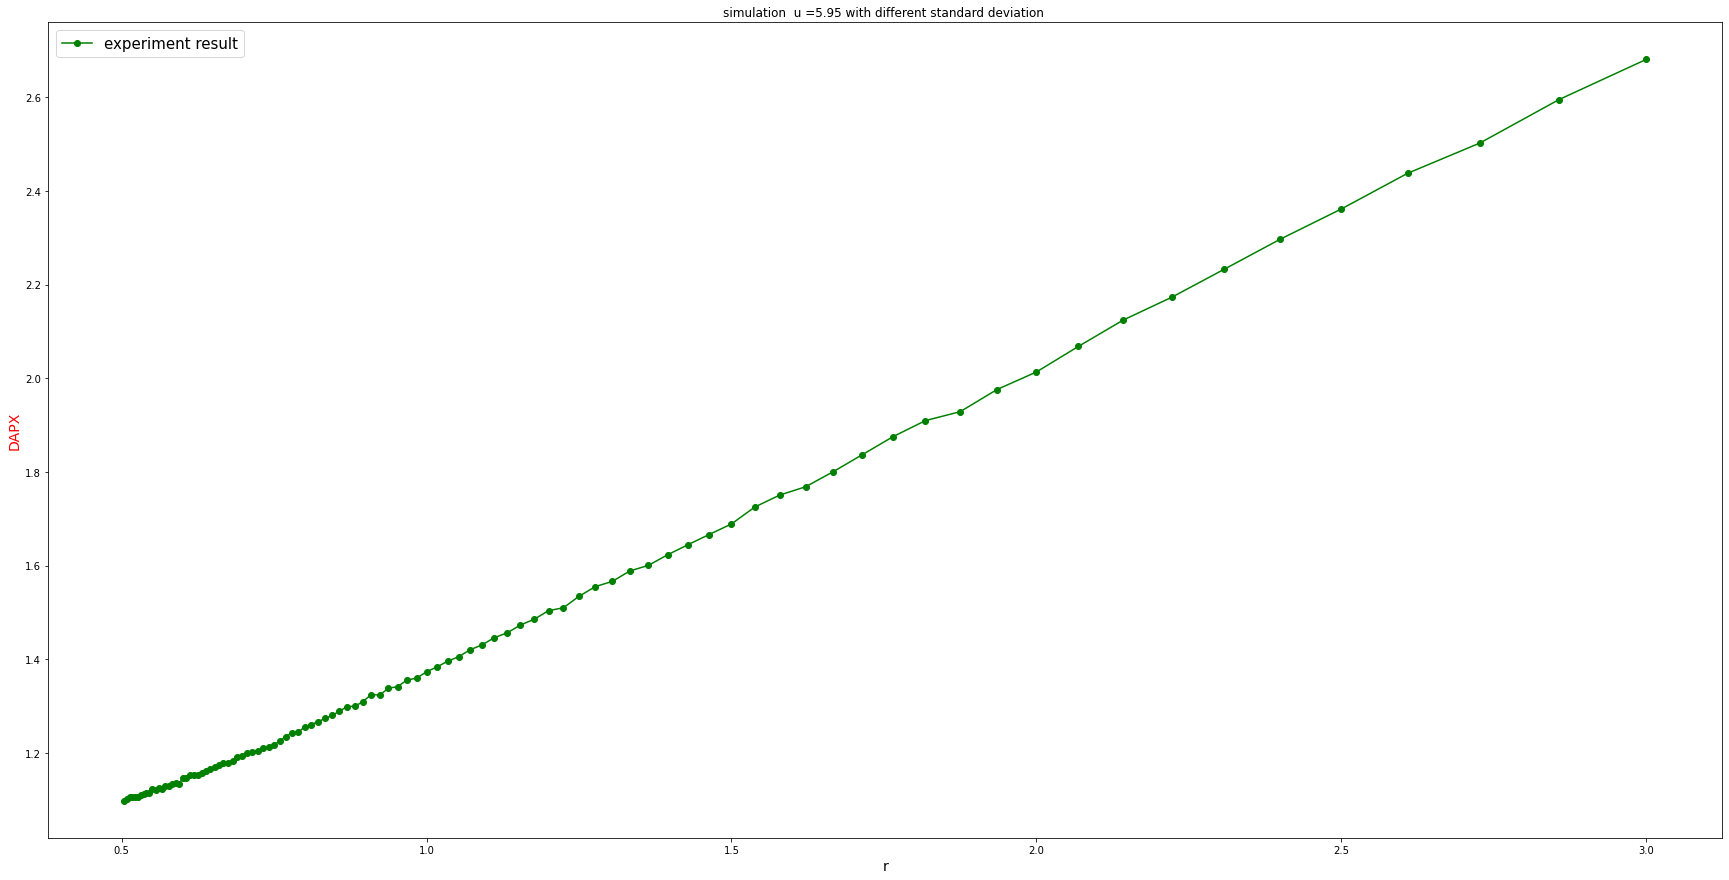

In [ ]:
 # create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(30, 15))
# make a plot
ax.plot(r_list1, DAPX_list1,color="green",marker="o",label="experiment result")
#ax.plot(r_list1, p_d_list1,color="blue",marker="o",label="Numerical solution")
plt.legend(loc="upper left",fontsize = 15)
# set x-axis label
ax.set_xlabel("r",fontsize=14)
# set y-axis label
ax.set_ylabel("DAPX",color="red",fontsize=14)
#ax.set_ylim(0.7,1.2)

# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax2.plot(sigma_list, diff,color="blue",marker="o")
#ax2.set_ylabel("difference",color="blue",fontsize=14)
#ax2.axhline(0,color="red")
plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')

plt.show()

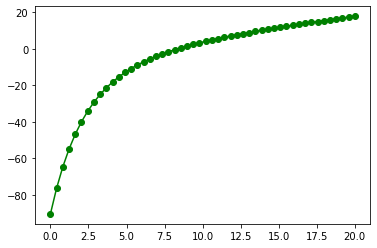

In [ ]:
u = 10
sigma = 5
v = np.linspace(0, 20, 50)

#constant of truncated normal distribution
k = 1/(1-norm.cdf(0, loc = u,scale = sigma))

phi = v - (1-k*norm.cdf(v, loc = u,scale = sigma) +k*norm.cdf(0, loc = u,scale = sigma))/(k*norm.pdf(v, loc = u,scale = sigma))
plt.plot(v, phi,color="green",marker="o")

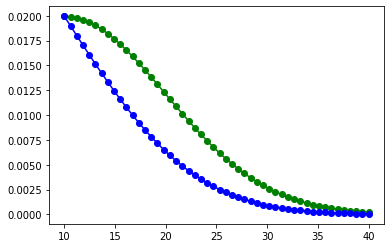

In [ ]:
u = 10
sigma = 10
v = np.linspace(10, 40, 50)
line1 = 0.5*norm.pdf(v, loc = u,scale = sigma)
line2 = norm.pdf(10, loc = u,scale = sigma)*(1-norm.cdf(v, loc = u,scale = sigma))
plt.plot(v, line1,color="green",marker="o",label="experiment result")
plt.plot(v, line2,color="blue",marker="o",label="experiment result")


In [ ]:
v = 10
k = 1/(1-norm.cdf(0, loc = u,scale = sigma))
norm.pdf(v, loc = u,scale = sigma)

1.0279773571668917e-18

In [ ]:
k = 1/(1-norm.cdf(0,loc = u,scale = sigma))
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return -x*(1-k*norm.cdf(x, loc = u,scale = sigma))

x0 = 0.5
res = minimize(rosen, x0, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
res.x


Optimization terminated successfully.
         Current function value: -1.743388
         Iterations: 33
         Function evaluations: 67


array([2.33401904])

In [ ]:
import scipy.special as sc
from scipy.optimize import fsolve
#not super accurate, but due to the character of cdf and pde maybe also factorial
u = 3
sigma = 1
def F(x):
   return [x[0] * (1 + np.log(x[1]/x[0])) - u,
           x[0] *(2*x[1]-x[0]) - u**2 - sigma**2]


root = fsolve(F, [1.8,4])
root
# np.isclose(F(x), [ 0.0])

array([1.49414051, 4.09347574])

In [ ]:

N = 10000
n = 0
A = np.ceil((pi2/pi1-1)/don)
rej_sample =[]
while(n <= N):
  x = uniform.rvs(loc=pi1, scale=pi2-pi1)
  a = (pi2/x-1)/don/(A/(pi2- pi1))
  u1 = uniform.rvs()
  if (u1 <= a):
    rej_sample.append(x)
    n += 1



(array([7103., 7252., 7191., 7236., 7067., 6743., 6113., 5650., 4983.,
        4666., 4268., 3910., 3548., 3320., 2906., 2690., 2331., 2108.,
        1928., 1648., 1518., 1270., 1124.,  941.,  768.,  648.,  463.,
         337.,  197.,   74.]),
 array([1.00003932, 1.0666106 , 1.13318188, 1.19975316, 1.26632444,
        1.33289573, 1.39946701, 1.46603829, 1.53260957, 1.59918085,
        1.66575213, 1.73232342, 1.7988947 , 1.86546598, 1.93203726,
        1.99860854, 2.06517982, 2.13175111, 2.19832239, 2.26489367,
        2.33146495, 2.39803623, 2.46460751, 2.5311788 , 2.59775008,
        2.66432136, 2.73089264, 2.79746392, 2.8640352 , 2.93060649,
        2.99717777]),
 <a list of 30 Patch objects>)

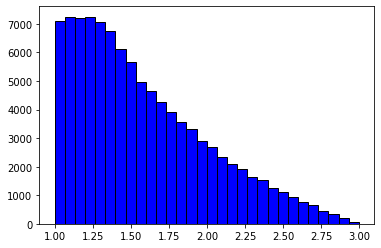

In [ ]:
plt.hist(rej_sample, color = 'blue', edgecolor = 'black',bins = 30)

In [ ]:
np.random.seed(5)
n = 10000
a = 2
b = 10 

u = 3
sigma = 1

data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)

p_d = 1 + np.log(1 + (sigma/u)**2)

 
opt = u
revenue=0
for i in rej_sample:
  revenue += auction_exp(data_uniform,i)

exp_revenue = revenue/len(rej_sample)

APX = opt/exp_revenue
print('worst case robust APX upper bound = ' + str(p_d))
print('Uniform distribution APX = ' + str(APX))


worst case robust APX upper bound = 1.1053605156578263
Uniform distribution APX = 1.4096148418873307


In [ ]:
exp_revenue


2.121527270494244